In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pkl_df1 = '../pickled_data/fire_df_pred_one.pkl'
pkl_df2 = '../pickled_data/fire_df_pred_two.pkl'

fire_df1 = pd.read_pickle(pkl_df1)
fire_df2 = pd.read_pickle(pkl_df2)

In [11]:
fire_df1.head()

,origin,busi_impact,num_casualties,num_rescued,est_loss,est_displaced,ext_agent_app_or_defer_time,extent,fire_alarm_impact_on_evac,fire_alarm_sys_op,...,material_first_ignited,method_of_fire_control,possible_cause,property_use,smoke_alarm_at_fire_origin_alarm_failure,smoke_alarm_at_fire_origin_alarm_type,status_of_fire_on_arrival,alarm_time,arrival_time,response_time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,273.0
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,311.0
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,222.0
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,177.0
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,304.0


In [12]:
fire_df1.origin.unique()

array(['Porch or Balcony', 'Cooking Area or Kitchen',
       'Living Area (e.g. living, TV, recreation, etc)',
       'Undetermined  (formerly 98)',
       'Sleeping Area or Bedroom (inc. patients room, dormitory, etc)',
       'Engine Area', 'Concealed Ceiling Area', 'Hallway, Corridor',
       'Laundry Area', 'Roof', 'Electrical Systems',
       'Storage Area (outside)', 'Basement/cellar (not partitioned)',
       'Court, Patio, Terrace', 'Lobby, Entranceway',
       'Trash, Rubbish Storage (inc garbage chute room, garbage/industri',
       'Other Outside Area',
       'Closet (eg. clothes, broom, linen closet, etc.)', 'Garage',
       'Trash, rubbish area (outside)',
       'Dining or Beverage Area (inc mess, canteen, lunchroom, cafeteria',
       'Washroom or Bathroom (toilet,restroom/locker room)',
       'Attached Deck', 'Other - unclassified',
       'Mechanical/Electrical Services Room', 'Other Storage Area',
       'Stairway, Escalator', 'Attic Area', 'Other Structural Area',


In [13]:
fire_df1.busi_impact.unique()

array(['No business interruption', 'Undetermined',
       'Not applicable (not a business)', 'May not resume operations',
       'May resume operations within a month',
       'May resume operations within a week',
       'May resume operations within a year'], dtype=object)

In [14]:
fire_df2.head()

,b_impact_labels_b_impact_1,b_impact_labels_b_impact_2,b_impact_labels_b_impact_3,b_impact_labels_b_impact_4,b_impact_labels_b_impact_5,b_impact_labels_b_impact_6,extent_labels_extent_1,extent_labels_extent_10,extent_labels_extent_11,extent_labels_extent_2,...,status_labels_status_7,num_casualties,num_rescued,est_displaced,incident_station_area,incident_ward,latitude,longitude,response_time,est_loss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.000000,1.000000,-1.000000,-0.982036,-0.209302,0.332675,-0.127842,-0.972096,3000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.000000,-0.348837,-0.943944,-0.814371,-0.720930,0.287465,-0.589602,-0.967838,50000.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.866667,-0.627907,-0.739740,0.281437,0.209302,-0.468474,0.024923,-0.977811,1000000.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.000000,-0.720930,-0.971972,0.323353,-0.116279,-0.530276,-0.054320,-0.982854,1000000.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.066667,-0.744186,-0.995996,0.982036,-0.813953,-0.152388,-0.515681,-0.968622,125000.0


In [45]:
corr_matrix = fire_df2.corr()
feature_corr = corr_matrix['est_loss'].sort_values(ascending=False)

In [46]:
feature_corr

est_loss                      1.000000
b_impact_labels_b_impact_3    0.173096
extent_labels_extent_3        0.160889
est_displaced                 0.115060
extent_labels_extent_4        0.071737
                                ...   
status_labels_status_4       -0.020748
sys_op_labels_sys_op_1       -0.024736
extent_labels_extent_1       -0.033230
ctrl_labels_ctrl_1           -0.043458
status_labels_status_1       -0.050391
Name: est_loss, Length: 64, dtype: float64

In [17]:
# Use Random Forest Clf to look at feature importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = fire_df2.drop(columns=['est_loss'])
y = fire_df2['est_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                      feature  importance
57             est_displaced    0.207401
61                 longitude    0.150347
59             incident_ward    0.127347
33  failure_labels_failure_1    0.097349
58     incident_station_area    0.070566
..                       ...         ...
22    impact_labels_impact_6    0.000013
41  failure_labels_failure_8    0.000008
39  failure_labels_failure_6    0.000007
35  failure_labels_failure_2    0.000007
47        type_labels_type_5    0.000002

[63 rows x 2 columns]


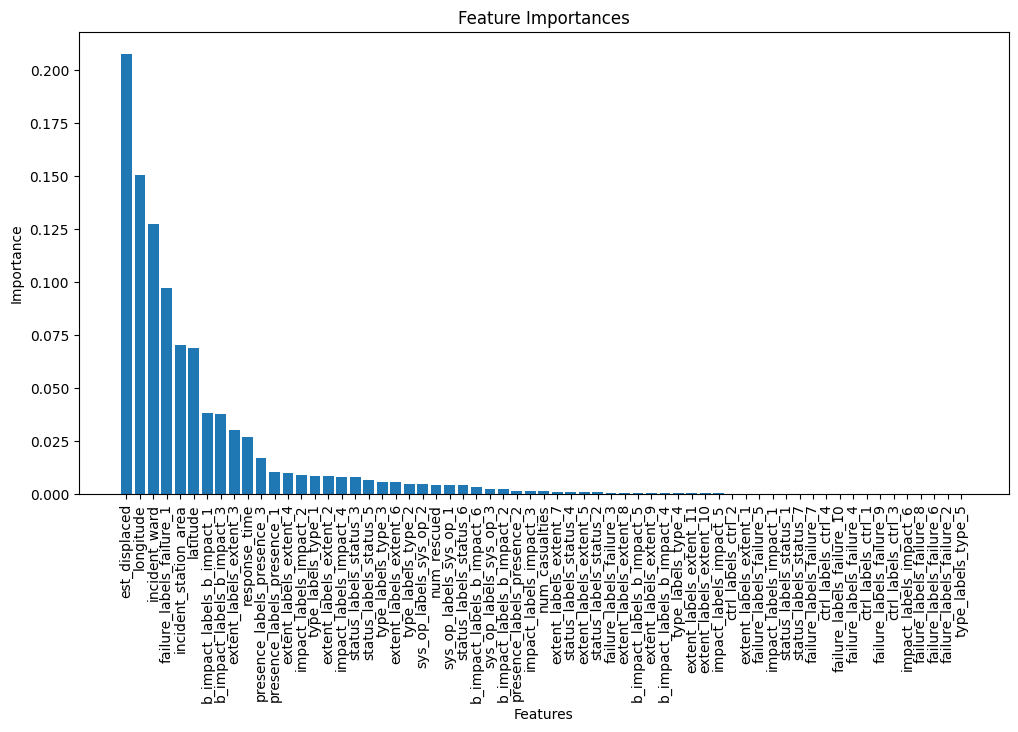

Number of features to keep: 21
Features to keep:
 ['est_displaced', 'longitude', 'incident_ward', 'failure_labels_failure_1', 'incident_station_area', 'latitude', 'b_impact_labels_b_impact_1', 'b_impact_labels_b_impact_3', 'extent_labels_extent_3', 'response_time', 'presence_labels_presence_3', 'presence_labels_presence_1', 'extent_labels_extent_4', 'impact_labels_impact_2', 'type_labels_type_1', 'extent_labels_extent_2', 'impact_labels_impact_4', 'status_labels_status_3', 'status_labels_status_5', 'type_labels_type_3', 'extent_labels_extent_6']


In [18]:
# Find a cumulative importance threshold

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Calculate cumulative importance
cumulative_importance = np.cumsum(feature_importance_df['importance'])

# Determine the number of features to keep to reach 95% cumulative importance
cutoff_index = np.where(cumulative_importance >= 0.95)[0][0]

# Features to keep
features_to_keep = feature_importance_df.iloc[:cutoff_index + 1]['feature'].tolist()

print(f"Number of features to keep: {cutoff_index + 1}")
print(f"Features to keep:\n {features_to_keep}")

In [39]:
important_df = fire_df2[['est_loss', 'est_displaced', 'longitude', 'incident_ward', 'failure_labels_failure_1', 
                         'incident_station_area', 'latitude']]

In [40]:
important_df

,est_loss,est_displaced,longitude,incident_ward,failure_labels_failure_1,incident_station_area,latitude
0,3000.0,-1.000000,-0.127842,-0.209302,0.0,-0.982036,0.332675
1,50000.0,-0.943944,-0.589602,-0.720930,0.0,-0.814371,0.287465
2,1000000.0,-0.739740,0.024923,0.209302,0.0,0.281437,-0.468474
3,1000000.0,-0.971972,-0.054320,-0.116279,0.0,0.323353,-0.530276
4,125000.0,-0.995996,-0.515681,-0.813953,0.0,0.982036,-0.152388
...,...,...,...,...,...,...,...
11209,0.0,-1.000000,0.023678,-0.441860,0.0,0.209581,-0.390772
11210,1000.0,-1.000000,0.387997,-0.116279,0.0,-0.335329,0.091742
11211,0.0,-1.000000,0.387997,-0.116279,0.0,-0.335329,0.091742
11212,100000.0,-0.997998,-0.473882,-0.720930,0.0,-0.820359,0.356021


In [41]:
X = important_df.drop(columns='est_loss')
y = important_df['est_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [47]:
# Trying SVR before using origin embeddings

from sklearn.svm import SVR

svr = SVR(kernel='linear')

In [48]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [49]:
# Goal is to be lower than 191481.60688201035 (pred_two file)
from sklearn.metrics import mean_squared_error

svr_loss_pred = svr.predict(X_test)

svr_linear_mse = mean_squared_error(y_test, svr_loss_pred)
svr_linear_rmse = np.sqrt(svr_linear_mse)
svr_linear_rmse

191488.56978104688

In [50]:
from sklearn.model_selection import cross_val_score

svr = SVR(kernel='linear', C=1)
scores = cross_val_score(svr, X, y, cv=5)
scores

array([-0.00454479, -0.04830724, -0.02895301, -0.02935745, -0.0455671 ])

In [59]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.03 accuracy with a standard deviation of 0.02


In [60]:
# Grid search cv

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Print all the results
results = pd.DataFrame(grid_search.cv_results_)
print(results)

# Optionally, you can save the best model
best_model = grid_search.best_estimator_

Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score:  -348496203246.1393
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0        3.125801      0.555512         0.472200        0.144425      0.1   
1        3.635800      0.297582         0.596400        0.108824      0.1   
2        4.132023      0.574936         2.167413        0.303223      0.1   
3        4.623435      0.732727         0.640400        0.070920      0.1   
4        3.055215      0.418874         0.401999        0.066180      0.1   
..            ...           ...              ...             ...      ...   
91       3.592600      0.290872         0.563200        0.057698    100.0   
92       2.463999      0.058748         0.327000        0.009274    100.0   
93       2.739400      0.172062         0.372801        0.027389    100.0   
94       3.542199      0.209180         1.719799        0.015729    100.0   
95       4.287199      0.09978